In [2]:
from jesse import utils, research
import jesse.helpers as jh
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
exchange = 'Binance Perpetual Futures'
start_date = jh.date_to_timestamp('2024-10-01')
finish_date = jh.date_to_timestamp('2024-10-03')

_, c1 = research.get_candles(exchange, 'ETH-USDT', '15m', start_date_timestamp=start_date, finish_date_timestamp=finish_date)
# candles are visual representation of price movements for a specific period 
# timestamp, open price, close price, high price, low price, volume

_, c2 = research.get_candles(exchange, 'ETC-USDT', '15m', start_date_timestamp=start_date, finish_date_timestamp=finish_date)

In [6]:
times = []

for c in c1:
    times.append(datetime.fromtimestamp(c[0] / 1000))

c1 = utils.prices_to_returns(c1[:, 2])
c2 = utils.prices_to_returns(c2[:, 2])

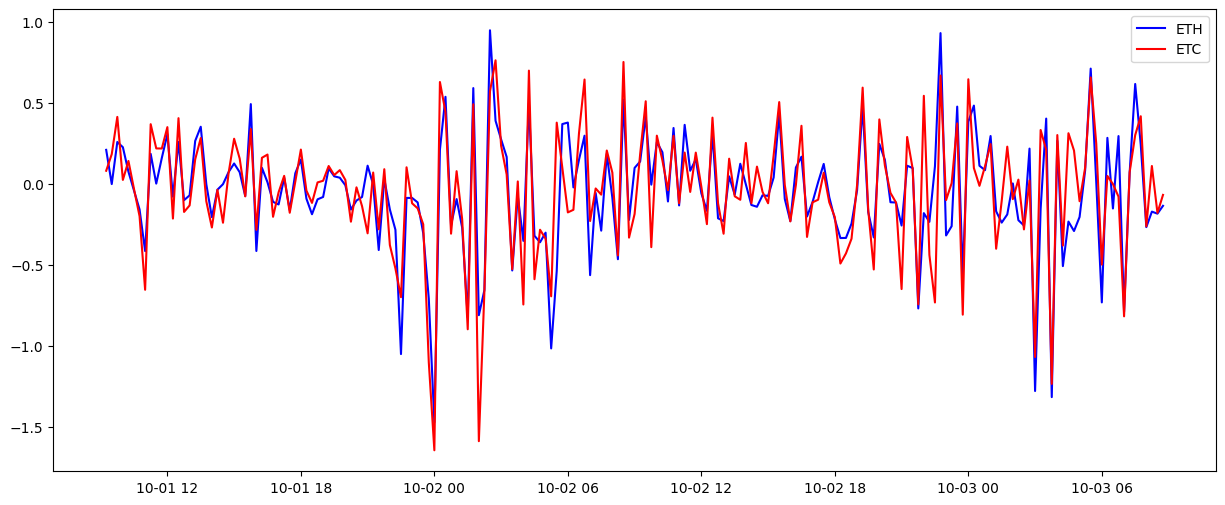

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(times, c1, color='blue', label='ETH')
plt.plot(times, c2, color='red', label='ETC')
plt.legend()



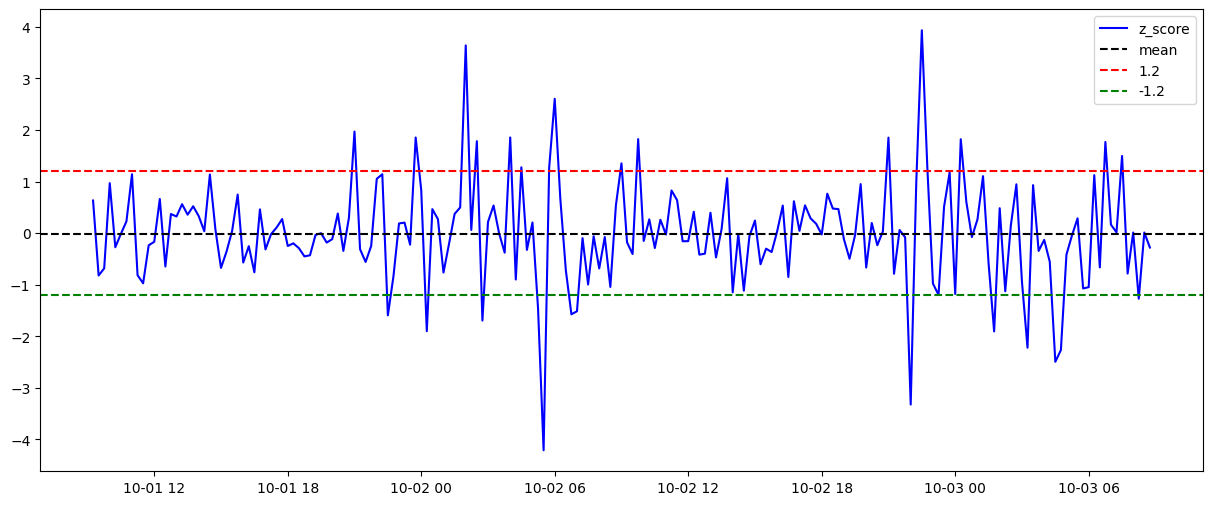

In [11]:
spread = c1[1:] - c2[1:]
z_score = utils.z_score(spread)
mean = np.mean(spread)

plt.figure(figsize=(15,6))
plt.plot(times[1:], z_score, color='blue', label='z_score')
plt.axhline(mean, color='black', linestyle='--', label='mean')
plt.axhline(1.2, color='red', linestyle='--', label='1.2')
plt.axhline(-1.2, color='green', linestyle='--', label='-1.2')
plt.legend();

In [12]:
is_cointegrated = utils.are_cointegrated(c1[1:], c2[1:])
print(is_cointegrated)

True
